# Projet final SDD1002
Par Aymen Ben Yahia et Émile Wamba

Importation des librairies et du fichier csv à partir de Google Drive

In [1]:
#Importation des librairies
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

#Lecture du fichier à partir de Google Drive
file_id = '14_MNNZKu7roXgOx9OIGSaauNt82qkUzt'
direct_link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(direct_link)
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Prétraitement des données

### Gestion des données manquantes
Tout d'abord, nous devons vérifier si notre tableau contient des données manquantes...

In [2]:
#On vérifie s'il y a des valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Comme nous pouvons le constater, certaines colonnes manques de données (ceux en dessous de 920 spécifiquement). Nous pouvons régler ce problème en utilisant interpolate(), qui va remplir les colonnes numériques avec la moyenne de la colonne complète, et ensuite utiliser dropna() pour enlever les colonnes qui contiennent encore des valeurs manquantes, dans ce cas-ci, ce sera les colonnes non-numériques. Pour le reste du projet, nous n'aurons seulement besoin des valeurs numériques de toute manière.

In [3]:
#interpolate pour les colonnes numériques, et dropna pour les non-numériques
data = data.interpolate(method='linear').dropna(axis=1)
data

C:\Users\benya\AppData\Local\Temp\ipykernel_6172\2547523697.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear').dropna(axis=1)


,id,age,sex,dataset,cp,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,150.0,2.3,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,108.0,1.5,3.0,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,129.0,2.6,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,187.0,3.5,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,154.0,0.0,0.0,1
916,917,62,Male,VA Long Beach,typical angina,124.5,139.0,127.0,0.0,0.0,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,100.0,0.0,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,121.0,385.0,96.5,0.0,0.0,0


### Conversion de types avec LabelEncoder
Dans ce qui suit, nous allons utiliser LabelEncoder pour pouvoir convertir les labels en un entier (0,1,2,...)

Tout d'abord, initialisons la classe LabelEncoder()

In [4]:
#Initialisation de LabelEncoder
label_encoder = LabelEncoder()

Ensuite, vérifions les différentes valeurs des colonnes que nous voulons convertir, pour prédire le nombre de label que nous aurons

In [5]:
#Affichage des différentes valurs des colonnes dans la console
print("Valeurs de la colonne dataset :",data["dataset"].unique())
print("Valeurs de la colonne sex :",data["sex"].unique())
print("Valeurs de la colonne cp :",data["cp"].unique())

Valeurs de la colonne dataset : ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Valeurs de la colonne sex : ['Male' 'Female']
Valeurs de la colonne cp : ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']


Comme nous pouvons le voir, dataset contient 4 valeurs différentes, alors nous pourrions nous attendre à des entiers de 0 à 3 pour représenter ces valeurs. Le même principe s'applique pour les autres colonnes. Appliquons donc le LabelEncoder...

In [6]:
#Conversion en entier
dataLE = data
dataLE["dataset"] = label_encoder.fit_transform(data["dataset"])
dataLE["cp"] = label_encoder.fit_transform(data["cp"])
dataLE["sex"] = label_encoder.fit_transform(data["sex"])
dataLE

,id,age,sex,dataset,cp,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,1,0,3,145.0,233.0,150.0,2.3,0.0,0
1,2,67,1,0,0,160.0,286.0,108.0,1.5,3.0,2
2,3,67,1,0,0,120.0,229.0,129.0,2.6,2.0,1
3,4,37,1,0,2,130.0,250.0,187.0,3.5,0.0,0
4,5,41,0,0,1,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,154.0,0.0,0.0,1
916,917,62,1,3,3,124.5,139.0,127.0,0.0,0.0,0
917,918,55,1,3,0,122.0,223.0,100.0,0.0,0.0,2
918,919,58,1,3,0,121.0,385.0,96.5,0.0,0.0,0


Notre prédiction fût donc vrai, pour comparaison, faisons la même opération avec le OneHotEncoder...

In [7]:
#Initialisation du OneHotEncoder
#sparse_output = False pour éviter d'étendre les données
ohe = OneHotEncoder(sparse_output = False).set_output(transform="pandas")

#Application du OneHotEncoder
oheDataset = ohe.fit_transform(data[["dataset"]])
oheCP = ohe.fit_transform(data[["cp"]])
oheSex = ohe.fit_transform(data[["sex"]])

#Concaténation des différentes dataset en un
dataOHE = pd.concat([data, oheDataset, oheCP, oheSex], axis = 1).drop(columns=["dataset", "cp", "sex"])
dataOHE

,id,age,trestbps,chol,thalch,oldpeak,ca,num,dataset_0,dataset_1,dataset_2,dataset_3,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1
0,1,63,145.0,233.0,150.0,2.3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,67,160.0,286.0,108.0,1.5,3.0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,67,120.0,229.0,129.0,2.6,2.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,37,130.0,250.0,187.0,3.5,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,41,130.0,204.0,172.0,1.4,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
916,917,62,124.5,139.0,127.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
917,918,55,122.0,223.0,100.0,0.0,0.0,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
918,919,58,121.0,385.0,96.5,0.0,0.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


et get_dummies()...

In [8]:
#Utilisation de get_dummies pour chaque colonnes visé
dummiesDataset = pd.get_dummies(data["dataset"])
dummiesCP = pd.get_dummies(data["cp"])
dummiesSex = pd.get_dummies(data["sex"])

#Concaténation des résultats dans un dataset
dataDummies = pd.concat([data, dummiesDataset, dummiesCP, dummiesSex], axis = 1).drop(columns=["dataset", "cp", "sex"])
dataDummies

,id,age,trestbps,chol,thalch,oldpeak,ca,num,0,1,2,3,0,1,2,3,0,1
0,1,63,145.0,233.0,150.0,2.3,0.0,0,True,False,False,False,False,False,False,True,False,True
1,2,67,160.0,286.0,108.0,1.5,3.0,2,True,False,False,False,True,False,False,False,False,True
2,3,67,120.0,229.0,129.0,2.6,2.0,1,True,False,False,False,True,False,False,False,False,True
3,4,37,130.0,250.0,187.0,3.5,0.0,0,True,False,False,False,False,False,True,False,False,True
4,5,41,130.0,204.0,172.0,1.4,0.0,0,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,0.0,1,False,False,False,True,True,False,False,False,True,False
916,917,62,124.5,139.0,127.0,0.0,0.0,0,False,False,False,True,False,False,False,True,False,True
917,918,55,122.0,223.0,100.0,0.0,0.0,2,False,False,False,True,True,False,False,False,False,True
918,919,58,121.0,385.0,96.5,0.0,0.0,0,False,False,False,True,True,False,False,False,False,True


Première chose qu'on peut remarquer comme différence : le getdummies() normalise les labels en colonnes (donc il affiche les numéros des labels dans les colonnes) et met les valeurs dans les rangées en booléens, alors que les deux autres méthodes affiche le titre du label dans les colonnes et met des binaires en valeurs à la place des booléens. La grosse différence entre le LabelEncoder et le OneHotEncoder est le nombre de colonne. En effet, le LabelEncoder garde les mêmes colonnes qu'avant et ne fait qu'attribuer aux labels une variable entières, et les remplace dans le tableau. Pour ce qui est du OneHotEncoder, chaque valeurs de label est représenté par une colonne chaque, et les données qui ont un des labels par exemple ont la valeur de 1 dans la colonne (valeur en binaire, 0 pour False et 1 pour True). Le LabelEncoder nous a l'air d'être le meilleur choix, puisqu'il est beaucoup plus propre et clair que les autres méthodes.

## Analyse exploratoire des données
### Graphiques de distribution

Pour pouvoir déterminer les relations entre les variables et mieux comprendre les maladies du coeur, nous allons visualiser ces variables à l'aide de la librairie Seaborn pour illustrer les graphiques de distribution pour pouvoir mieux analyser les données. Commencons par établir le taux de cholestérol (chol) comme variable cible.

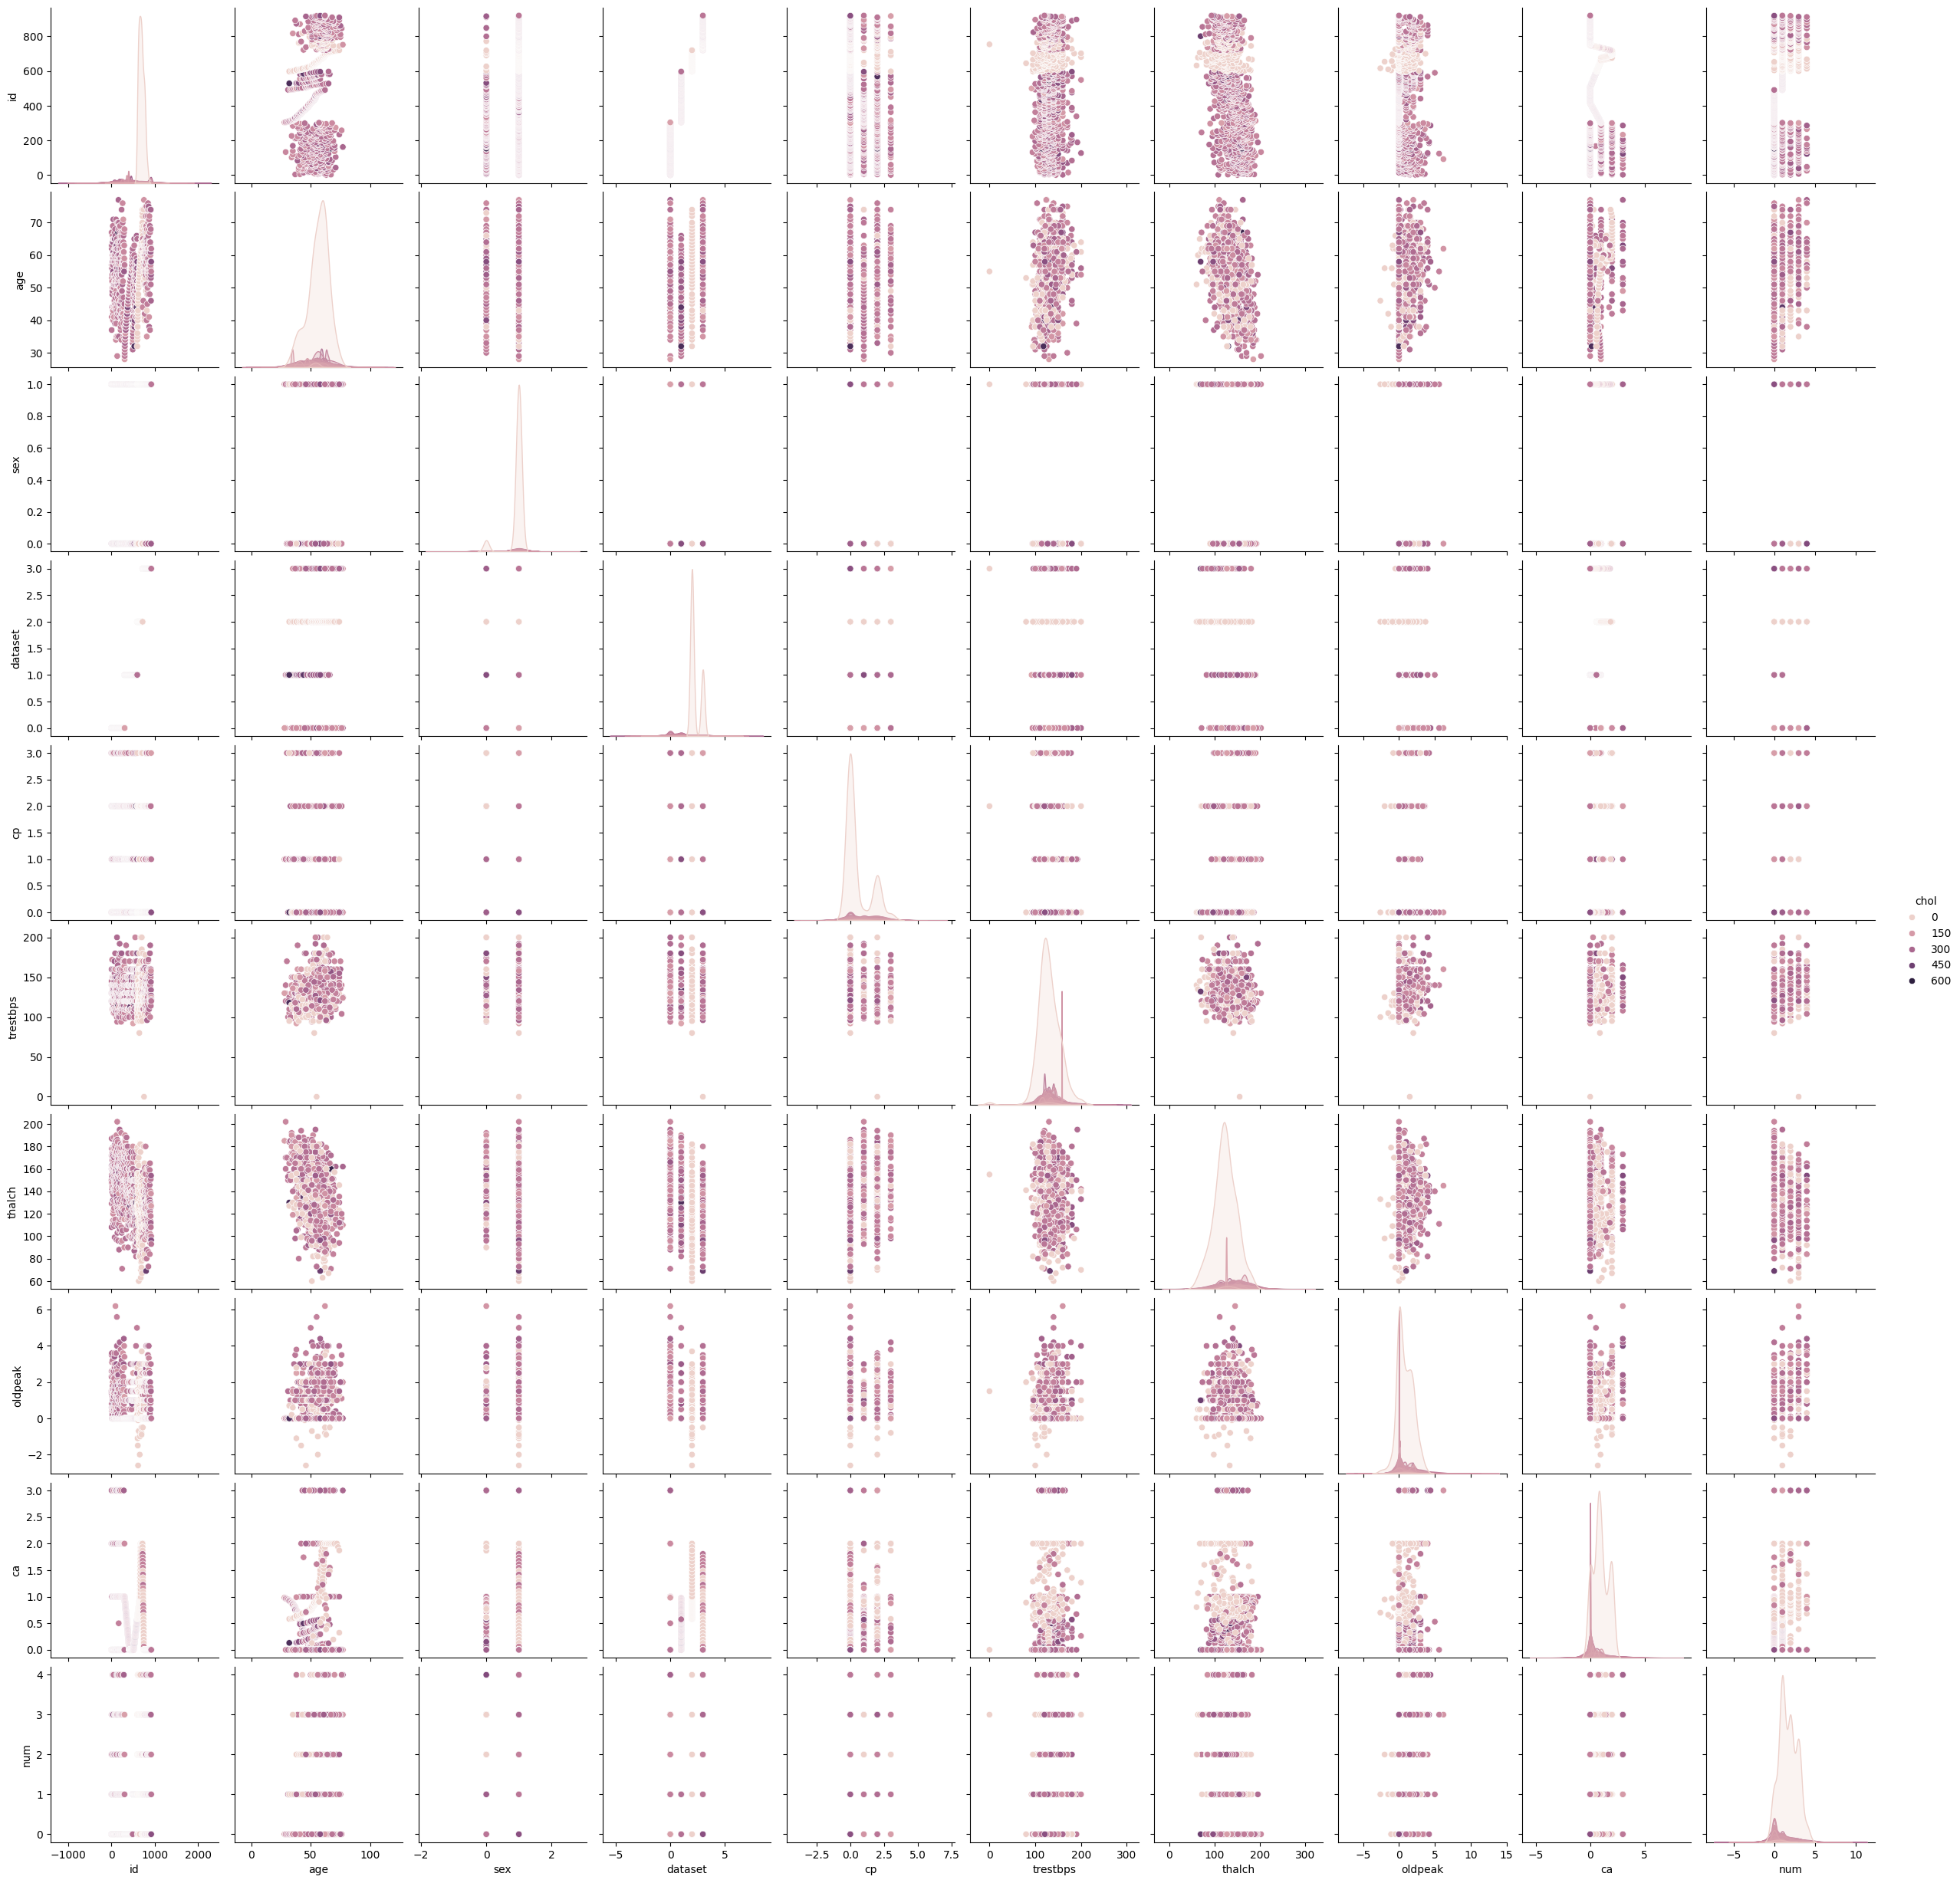

In [9]:
sns.pairplot(dataLE, hue='chol')

Essayons de visualiser la relation entre notre variable cible et le taux de battements de coeur max (thalch)

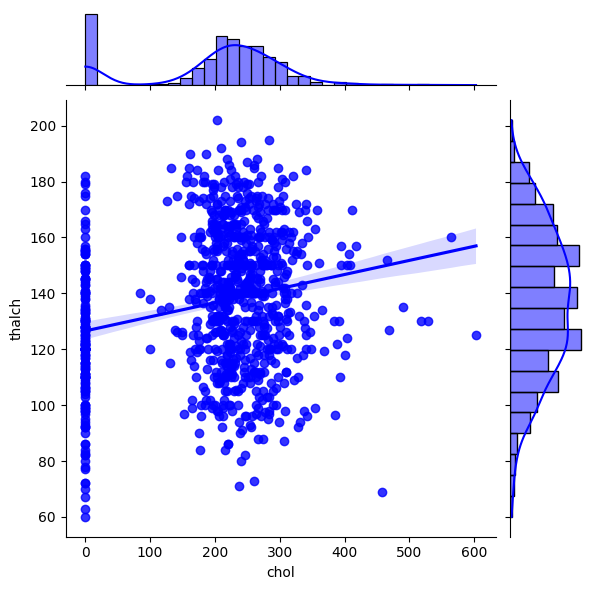

In [20]:
sns.jointplot(data=dataLE, x='chol', y='thalch', kind='reg', color="blue")

Visualisons aussi notre variable cible avec la pression du sang au repos (trestbps)

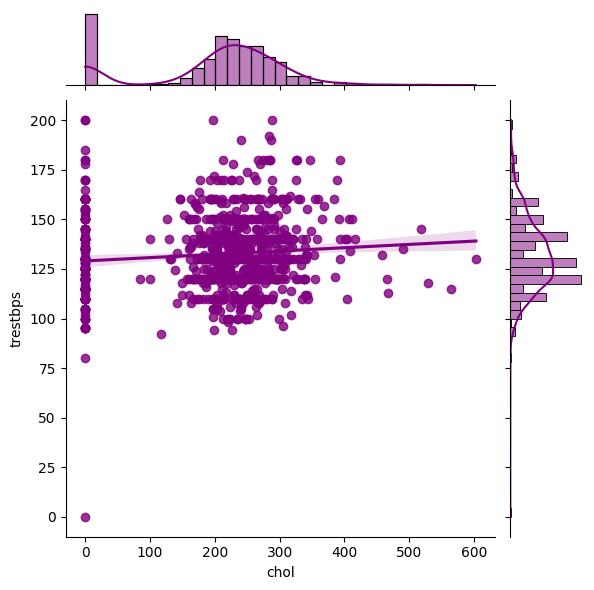

In [18]:
sns.jointplot(data=dataLE, x='chol', y='trestbps',  kind='reg', color="purple")

Nous pouvons constater qu'il y a belle et bien une relation des deux variables avec la variable cible. En effet, la densité des deux graphiques tend vers le positif. Nous pouvons donc assumer que plus la mesure de cholestérol est haute, plus la pression sanguine et le taux de battements du coeur max augmente!

### Cartes de chaleur
Ajoutons une visualisation supplémentaire des données avec une carte de chaleur en utilisant la Confusion Matrix

<Axes: >

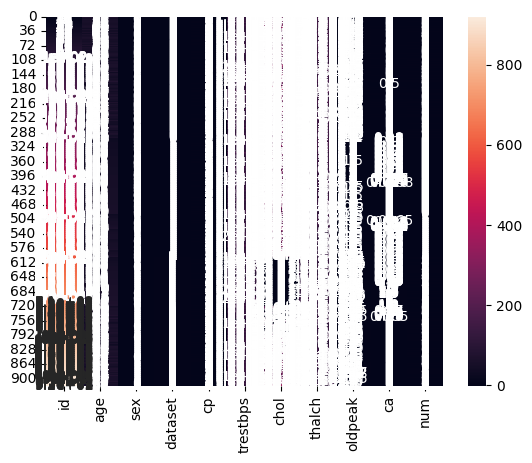

In [22]:
cm = confusion_matrix(y_test, )